# Example of functional MRI "Decoding" with MVPA

In [93]:
import os
import numpy as np
import pandas as pd

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import IFrame, Image

In [95]:
%matplotlib inline

## Machine learning reminder

### Consider wine dataset to predict a good/bad quality label according to various features

In [96]:
wine_df = pd.read_csv('wine.csv')
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


#### Extract labels as vector y_label

In [97]:
y_label = wine_df.iloc[:, -1]
y_label

0        bad
1        bad
2        bad
3       good
4        bad
        ... 
1594     bad
1595    good
1596    good
1597     bad
1598    good
Name: quality, Length: 1599, dtype: object

#### Extract the features as matrix X

In [102]:
X = wine_df.iloc[:, :-1]
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


### Implement basic machine learning workflow with a linear model

1. Convert `string` label (`good`, `bad`) into numeric data
2. Split the data into a training (60% of data) and testing (40% data) sets
3. Fit a model on the training data to estimate the model parameters
4. Predict the label and compare the predictions with the ground truth to obtain a performance score

#### 1. Convert `string` label (`good`, `bad`) into numeric data

In [103]:
from sklearn import preprocessing

##### The long way with `.fit()`, then `.transform()`

In [106]:
label_to_num = preprocessing.LabelEncoder()

In [107]:
label_to_num.

LabelEncoder()

In [108]:
label_to_num.fit(y_label)

LabelEncoder()

In [109]:
label_to_num.classes_

array(['bad', 'good'], dtype=object)

In [110]:
y = label_to_num.transform(y_label)
y

array([0, 0, 0, ..., 1, 0, 1])

##### The short way with `.fit_transform()`

In [111]:
label_to_num = preprocessing.LabelEncoder()

In [112]:
label_to_num

LabelEncoder()

In [113]:
y = label_to_num.fit_transform(y_label)
y

array([0, 0, 0, ..., 1, 0, 1])

#### 2. Split the data into a training (70% of data) and testing (30% data) sets

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    stratify=y, random_state=42)

In [117]:
print(f"Original feature matrix X has {X.shape[0]} observations and {X.shape[1]} features")
print(f"Training feature matrix X has {X_train.shape[0]} observations and {X_train.shape[1]} features")
print(f"Testing feature matrix X has {X_test.shape[0]} observations and {X_test.shape[1]} features")

Original feature matrix X has 1599 observations and 11 features
Training feature matrix X has 1119 observations and 11 features
Testing feature matrix X has 480 observations and 11 features


In [118]:
print(f"Original label vector y has {y.shape[0]} labels")
print(f"Training label vector y has {y_train.shape[0]} labels")
print(f"Testing label vector y has {y_test.shape[0]} labels")

Original label vector y has 1599 labels
Training label vector y has 1119 labels
Testing label vector y has 480 labels


#### 3. Fit the model on the training data to estimate the model parameters

In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
lr = LogisticRegression(penalty='none', max_iter=1000)

In [121]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='none')

#### 4. Predict the label and compare the predictions with the ground truth to obtain a performance score

In [122]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

##### Performance on training

In [124]:
y_pred_train = lr.predict(X_train)

In [125]:
confusion_matrix(y_train, y_pred_train)

array([[382, 139],
       [137, 461]])

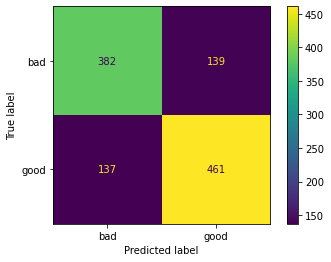

In [126]:
plot_confusion_matrix(lr, X_train, y_train, display_labels=label_to_num.classes_);

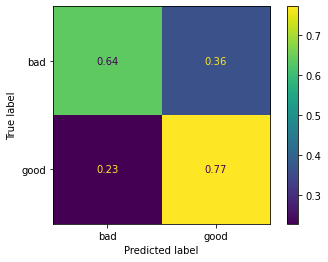

In [26]:
plot_confusion_matrix(lr, X_train, y_train, display_labels=label_to_num.classes_, normalize='true');

In [127]:
accuracy_score(y_train, y_pred_train)

0.7533512064343163

##### Performance on testing

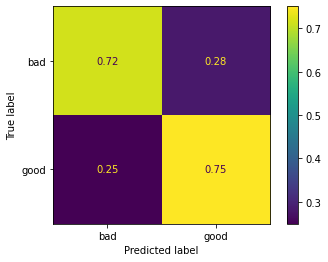

In [128]:
plot_confusion_matrix(lr, X_test, y_test, display_labels=label_to_num.classes_, normalize='true');

In [129]:
y_pred_test = lr.predict(X_test)

In [130]:
accuracy_score(y_test, y_pred_test)

0.7354166666666667

In [131]:
lr.coef_[0]

array([ 0.13129174, -3.27857512, -1.67882985,  0.03582888, -3.38666097,
        0.01977254, -0.01719095, -3.55660287, -0.65145685,  2.84258455,
        0.89572444])

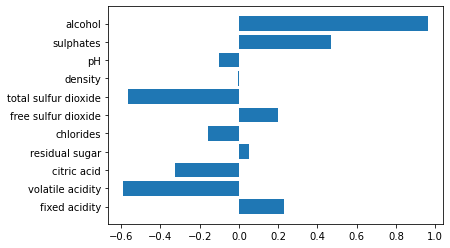

In [132]:
plt.barh(X.columns, np.std(X_train, 0)*lr.coef_[0]);

### Make the workflow a bit more interesting

1. Convert `string` label (`good`, `bad`) into numeric data  
2. Split the data into a training set (90% of data) and **an hold out testing (10% data) for final evaluation**
3. **Iterate on the training data split into folds**, leaving one fold out for testing, and combining remaining fold for training
4. **At each iteration** fit a model on the training data to estimate the model parameters 
5. Predict the label (wine quality) of the test data **in the left out fold**
6. Compare the predictions with the ground truth to obtain a performance score **in the left out fold**
7. Fit the model on the whole training data, and test it on the hold out test set

In [33]:
train_test_split?

#### Split the data into a training set (90% of data) and **an hold out testing (10% data) for final evaluation**

In [37]:
from sklearn.model_selection import train_test_split, StratifiedKFold
X_cv, X_final_test, y_cv, y_final_test = train_test_split(X, y, test_size=0.1, 
                                                          stratify=y, random_state=42)

#### Iterate on the training data split into folds

In [133]:
n_folds = 10
# Save accuracy performance
accuracy_perf = {'train': np.zeros(n_folds),
                 'test': np.zeros(n_folds)}
# Save model parameters at each iteration
lr_params = np.zeros((n_folds, len(X_cv.columns)))
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
# Iterate over each set of folds
for i_fold, (train_ix, test_ix) in enumerate(skf.split(X_cv, y_cv)):
    # test_ix is for our left out fold, and train_ix is from combining all other folds
    X_train, X_test = X_cv.iloc[train_ix], X_cv.iloc[test_ix]
    y_train, y_test = y_cv[train_ix], y_cv[test_ix]
    lr = LogisticRegression(penalty='none', max_iter=10000, class_weight='balanced')
    lr.fit(X_train, y_train)
    # Get performance on training and test set (test set = left out fold)
    accuracy_perf['train'][i_fold] = accuracy_score(y_train, lr.predict(X_train))
    accuracy_perf['test'][i_fold] = accuracy_score(y_test, lr.predict(X_test))
    # Get model parameters
    lr_params[i_fold, :] = np.std(X_train, 0)*lr.coef_[0]

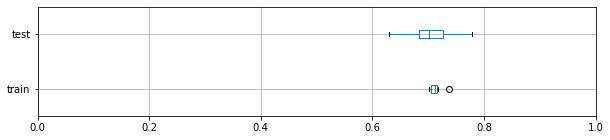

In [134]:
plt.figure(figsize=(10, 2))
pd.DataFrame(accuracy_perf).boxplot(vert=False);
plt.xlim(0, 1);

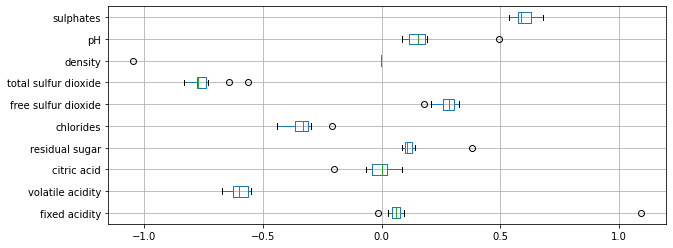

In [135]:
plt.figure(figsize=(10, 4))
pd.DataFrame(lr_params, columns=X_cv.columns).boxplot(vert=False);

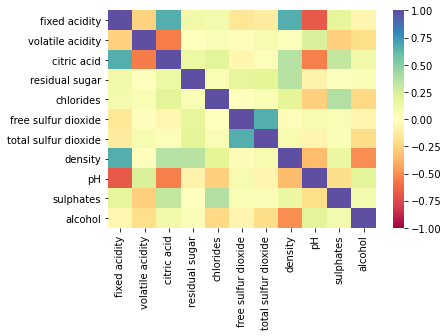

In [136]:
sns.heatmap(X.corr(), cmap="Spectral", vmin=-1, vmax=1);

#### Fit the model on the whole training data, and test it on the hold out test set

In [138]:
lr = LogisticRegression(penalty='none', max_iter=10000, class_weight='balanced')
lr.fit(X_cv, y_cv)
print(f"Training accuracy: {accuracy_score(y_cv, lr.predict(X_cv))}")
print(f"Hold out dataset test accuracy: {accuracy_score(y_final_test, lr.predict(X_final_test))}")

Training accuracy: 0.729673384294649
Hold out dataset test accuracy: 0.725


### Make the workflow even more interesting

1. Convert `string` label (`good`, `bad`) into numeric data
2. **Add interaction terms to prevent under-fitting**
3. Split the data into a training set (90% of data) and an hold out testing (10% data) for final evaluation
4. Iterate on data split into folds, leaving one fold out for testing, and combining remaining fold for training
5. At each iteration use a logistic regression **with ridge penalty (i.e. l2 norm) and optimize the regularization hyper-parameter `C`**:
    1. **Standardize the features**
    2. **Create an inner cross-validation loop to find the best `C`**
    **BONUS: use a `Pipeline` object**
6. Predict the label (wine quality) of the test data in the left out fold
7. Compare the predictions with the ground truth to obtain a performance score in the left out fold

#### Add interaction terms to prevent under-fitting

In [139]:
from sklearn.preprocessing import PolynomialFeatures

In [140]:
add_interactions = PolynomialFeatures(interaction_only=True, include_bias=False)
X_ir = add_interactions.fit_transform(X)

#### Split the data into a training set (90% of data) and **an hold out testing (10% data) for final evaluation**

In [143]:
from sklearn.model_selection import train_test_split
X_ir_cv, X_ir_final_test, y_cv, y_final_test = train_test_split(X_ir, y, test_size=0.1, 
                                                          stratify=y, random_state=42)

#### At each iteration use a logistic regression with ridge penalty (i.e. l2 norm) and optimize the regularization hyper-parameter `C`

In [144]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

##### The following cell will take a very long time to run, don't run as is if you do not have the required computer power. Instead change the grid search to have only a very small parameter search space

In [145]:
#n_cpus=12
n_folds = 10
# Save accuracy performance and hyper parameter values selected in inner CV
accuracy_perf = {'train': np.zeros(n_folds),
                 'test': np.zeros(n_folds)}
best_hyperparams = {'C': [],
                    'l1_ratio': []}
# Save model parameters at each iteration
lr_params = []
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
# Iterate over each set of folds
for i_fold, (train_ix, test_ix) in enumerate(skf.split(X_ir_cv, y_cv)):
    # test_ix is for our left out fold, and train_ix is from combining all other folds
    X_ir_train, X_ir_test = X_ir_cv[train_ix], X_ir_cv[test_ix]
    y_train, y_test = y_cv[train_ix], y_cv[test_ix]
    # Define pipeline adding scaling step before logistic regression model fitting
    lr_pipeline = Pipeline(
        [('scaler', StandardScaler()),
         ('lr', LogisticRegression(penalty='elasticnet', solver='saga',
                                   max_iter=10000, class_weight='balanced'))]
    )
    # Define the grid search using the previously given names with "dudder" __
    grid_search = GridSearchCV(lr_pipeline, n_jobs=n_cpus,
                               param_grid={'lr__C': [0.1, 0.5, 1.0, 5.0, 10, 50, 100],
                                           'lr__l1_ratio': np.linspace(0, 1, 11)})
    # Fit as before, but use the grid search object
    grid_search.fit(X_ir_train, y_train)
    # Get performance on training and test set (test set = left out fold)
    best_hyperparams['C'].append(grid_search.best_params_['lr__C'])
    best_hyperparams['l1_ratio'].append(grid_search.best_params_['lr__l1_ratio'])
    best_lr = grid_search.best_estimator_
    accuracy_perf['train'][i_fold] = accuracy_score(y_train, best_lr.predict(X_ir_train))
    accuracy_perf['test'][i_fold] = accuracy_score(y_test, best_lr.predict(X_ir_test))
    # Get model parameters
    lr_params.append(best_lr['lr'].coef_[0])
lr_params_df = pd.DataFrame(lr_params, columns=add_interactions.get_feature_names(X.columns))

In [146]:
best_hyperparams

{'C': [0.1, 0.1, 10, 10, 10, 10, 10, 0.1, 10, 10],
 'l1_ratio': [0.0, 0.5, 0.25, 0.0, 0.0, 0.25, 0.0, 0.25, 0.0, 0.0]}

In [147]:
accuracy_perf

{'train': array([0.76293436, 0.74440154, 0.77374517, 0.77065637, 0.76988417,
        0.77142857, 0.76525097, 0.74903475, 0.76679537, 0.77932099]),
 'test': array([0.73611111, 0.75      , 0.72222222, 0.73611111, 0.75      ,
        0.77083333, 0.8125    , 0.74305556, 0.73611111, 0.70629371])}

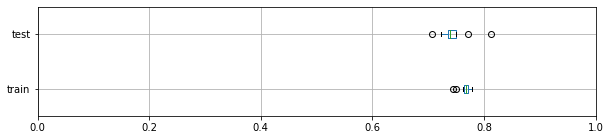

In [148]:
plt.figure(figsize=(10, 2))
pd.DataFrame(accuracy_perf).boxplot(vert=False);
plt.xlim(0, 1);

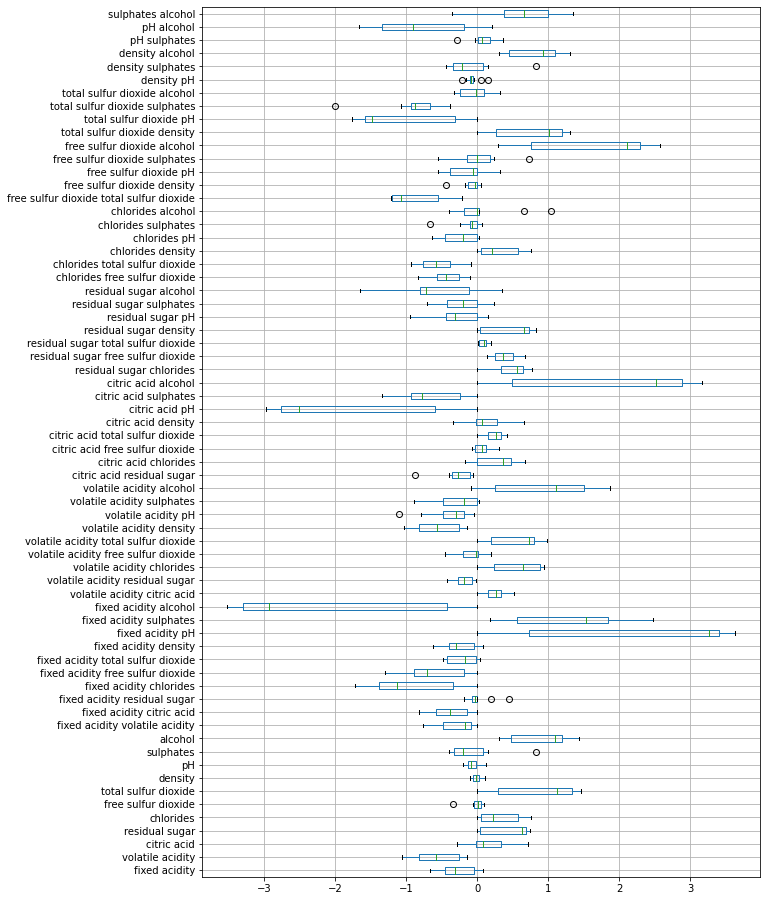

In [149]:
plt.figure(figsize=(10, 16))
lr_params_df.boxplot(vert=False);

#### Fit the model on the whole training data, and test it on the hold out test set

In [150]:
lr_pipeline = Pipeline(
    [('scaler', StandardScaler()),
     ('lr', LogisticRegression(penalty='elasticnet', solver='saga', max_iter=10000,
                               C=10, l1_ratio=0.25, class_weight='balanced'))]
)
lr_pipeline.fit(X_ir_cv, y_cv)
print(f"Training accuracy: {accuracy_score(y_cv, lr_pipeline.predict(X_ir_cv))}")
print(f"Hold out dataset test accuracy: {accuracy_score(y_final_test, lr_pipeline.predict(X_ir_final_test))}")

Training accuracy: 0.7713690062543433
Hold out dataset test accuracy: 0.75


In [398]:
lr_pipeline = Pipeline(
    [('scaler', StandardScaler()),
     ('lr', LogisticRegression(penalty='elasticnet', solver='saga', max_iter=10000,
                               C=0.1, l1_ratio=0.5, class_weight='balanced'))]
)
lr_pipeline.fit(X_ir_cv, y_cv)
print(f"Training accuracy: {accuracy_score(y_cv, lr_pipeline.predict(X_ir_cv))}")
print(f"Hold out dataset test accuracy: {accuracy_score(y_final_test, lr_pipeline.predict(X_ir_final_test))}")

Training accuracy: 0.7338429464906184
Hold out dataset test accuracy: 0.725


## Application to functional MRI

The aim of the machine learning task will be to predict stimuli according to brain activity. The brain activity will serve as features while the labels will be the stimuli types (face vs object). The multiple voxels used as features are considered to form a "pattern", hence the name multivariate pattern analysis (MVPA) for such machine learning tasks.

### Building the feature matrix

The feature matrix will consist of N rows corresponding to each stimuli, and of P columns corresponding to the set of P voxels considered (the whole brain, some Region Of Interest (ROI), etc.).

They are many ways to select voxel values to represent brain activity. In this case, we will use the first level of the GLM to create a beta map (a brain map of beta parameters) for each stimuli:
* the first level GLM includes a regressor for each single event
* the first level GLM provides in each voxel a beta value associated to this stimulus
* we filter the stimuli to keep only face and house images stimuli
* the task is then to predict among them if the stimulus was a face image or a house image

#### Creating beta maps for a set of runs of a given subject

In [151]:
from bids import BIDSLayout

In [152]:
from nilearn.glm.first_level import FirstLevelModel

In [153]:
!ls ds000105/derivatives

dataset_description.json  mriqc       sub-2	  sub-4       sub-6
desc-aparcaseg_dseg.tsv   sourcedata  sub-2.html  sub-4.html  sub-6.html
desc-aseg_dseg.tsv	  sub-1       sub-3	  sub-5
logs			  sub-1.html  sub-3.html  sub-5.html


In [154]:
data_dir = 'ds000105'
bids_layout = BIDSLayout(data_dir, derivatives=True)
bids_layout

/opt/conda/shared/envs/ni38/lib/python3.8/site-packages/bids/layout/models.py:148: FutureWarning: The 'extension' entity currently excludes the leading dot ('.'). As of version 0.14.0, it will include the leading dot. To suppress this warning and include the leading dot, use `bids.config.set_option('extension_initial_dot', True)`.
  warnings.warn("The 'extension' entity currently excludes the leading dot ('.'). "


BIDS Layout: .../home/brainhacker/glm/ds000105 | Subjects: 6 | Sessions: 0 | Runs: 30

In [155]:
bids_layout.get_subjects()

['1', '2', '3', '4', '5', '6']

In [156]:
sub_id = "1"

##### Example for run 1

In [157]:
run_id = "1"

In [158]:
# Get TR
raw_func_file = bids_layout.get(scope="raw", subject=sub_id, run=run_id, extension='nii.gz', 
                                suffix="bold", return_type='filename')[0]
raw_func_metadata = bids_layout.get_metadata(raw_func_file)
tr = raw_func_metadata['RepetitionTime']
# Get 4D fmri data
func_file = bids_layout.get(scope="derivatives", subject=sub_id, run=run_id, datatype='func',
                            extension='nii.gz', suffix="bold")[0]
# Get fmri mask
func_mask_file = bids_layout.get(scope="derivatives", subject=sub_id, run=run_id, datatype='func',
                                 extension='nii.gz', suffix="mask", return_type='filename')[0]
# Get event files and extract face and house
run_event_file = bids_layout.get(subject=sub_id, task="objectviewing", suffix="events", run="1")[0]
event_df = run_event_file.get_df()
# Get nuisance regressors
confounds_file = bids_layout.get(scope='fMRIPrep', desc='confounds', extension='tsv', 
                                 subject=sub_id, run=run_id)[0]
confounds_df = confounds_file.get_df()
nuisance_cols = ['csf', 'trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']
nuisance_regs = confounds_df[nuisance_cols]
# Define first level model
flm = FirstLevelModel(t_r=tr, hrf_model='glover', drift_model='cosine', 
                      high_pass=0.01, mask_img=func_mask_file, smoothing_fwhm=6,
                      noise_model='ar1', n_jobs=1, minimize_memory=False, subject_label=sub_id) 

In [159]:
event_df

,onset,duration,trial_type
0,12.0,0.5,scissors
1,14.0,0.5,scissors
2,16.0,0.5,scissors
3,18.0,0.5,scissors
4,20.0,0.5,scissors
...,...,...,...
91,278.0,0.5,chair
92,280.0,0.5,chair
93,282.0,0.5,chair
94,284.0,0.5,chair


In [160]:
event_df['trial_type'] = event_df['trial_type'] + '_' + \
                         event_df.groupby('trial_type').cumcount().astype('str').str.zfill(2)

In [161]:
event_df

,onset,duration,trial_type
0,12.0,0.5,scissors_00
1,14.0,0.5,scissors_01
2,16.0,0.5,scissors_02
3,18.0,0.5,scissors_03
4,20.0,0.5,scissors_04
...,...,...,...
91,278.0,0.5,chair_07
92,280.0,0.5,chair_08
93,282.0,0.5,chair_09
94,284.0,0.5,chair_10


In [162]:
flm.fit(run_imgs=func_file.path, events=event_df, confounds=nuisance_regs)

FirstLevelModel(mask_img='/home/brainhacker/glm/ds000105/derivatives/sub-1/func/sub-1_task-objectviewing_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz',
                minimize_memory=False, signal_scaling=True, smoothing_fwhm=6,
                subject_label='1', t_r=2.5)

In [163]:
from nilearn.plotting import plot_design_matrix

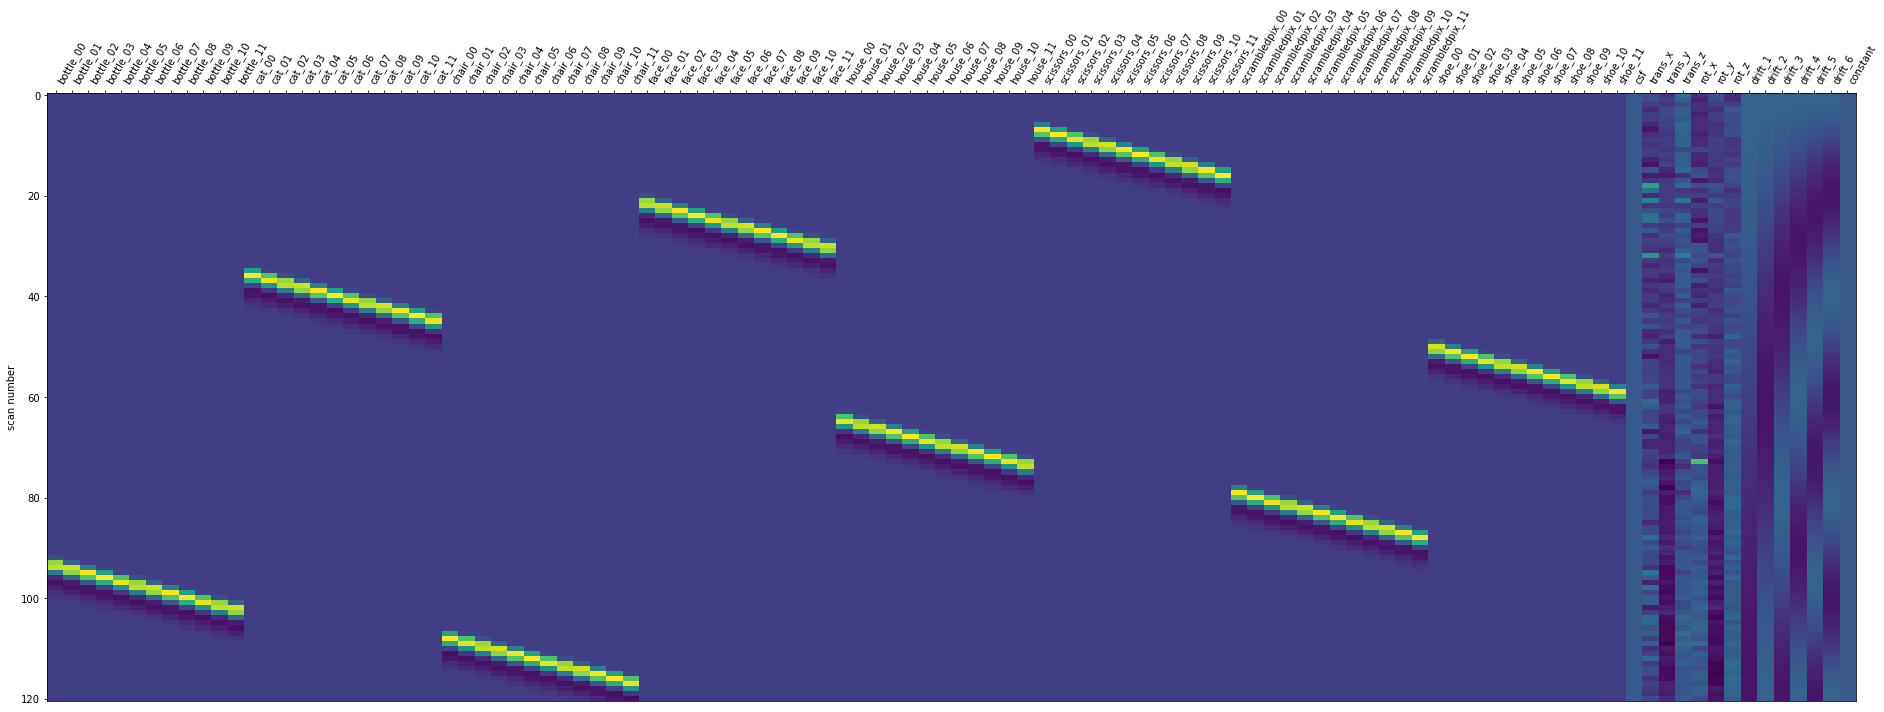

In [164]:
dm = flm.design_matrices_[0]
plot_design_matrix(dm);

##### We extract only stimuli corresponding to face and house

In [165]:
labels = [stim for stim in dm.columns if stim.startswith(('face', 'house'))]
labels

['face_00',
 'face_01',
 'face_02',
 'face_03',
 'face_04',
 'face_05',
 'face_06',
 'face_07',
 'face_08',
 'face_09',
 'face_10',
 'face_11',
 'house_00',
 'house_01',
 'house_02',
 'house_03',
 'house_04',
 'house_05',
 'house_06',
 'house_07',
 'house_08',
 'house_09',
 'house_10',
 'house_11']

In [166]:
y_label = [1 if label.startswith('face') else 0 for label in labels]
y_label

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Now we can compute the beta maps associated to each stimuli. There is one 3D map per stimulus.

In [167]:
betamaps_list = []
for label in labels:
    betamaps_list.append(flm.compute_contrast(label, stat_type='t', output_type='effect_size'))

We can concatenate them to have a single 4D volume.

In [168]:
from nilearn.image import concat_imgs, resample_to_img

In [169]:
betamaps = concat_imgs(betamaps_list)

In [170]:
betamaps.shape

(56, 62, 53, 24)

In [171]:
print(f"Our matrix design without feature selection would be {betamaps.shape[3]} x {betamaps.shape[0]*betamaps.shape[1]*betamaps.shape[2]}")

Our matrix design without feature selection would be 24 x 184016


##### Reducing the number of features, solution 1: selecting specific ROIs

Instead of getting all 56 * 62 * 53 voxels as features, we can select one or more ROIs. This can be done with an atlas.

In [172]:
from nilearn.datasets import fetch_atlas_harvard_oxford

# ho_atlas is a dictionary with the keys "labels" and "maps"
# We use the subcortical "maxprob" atlas, thresholded at 25 probability
harvard_oxford_atlas = fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm',
                                                 data_dir='./atlases')

In [173]:
from nilearn import plotting

In [174]:
harvard_oxford_maps = harvard_oxford_atlas['maps']
harvard_oxford_labels = harvard_oxford_atlas['labels']


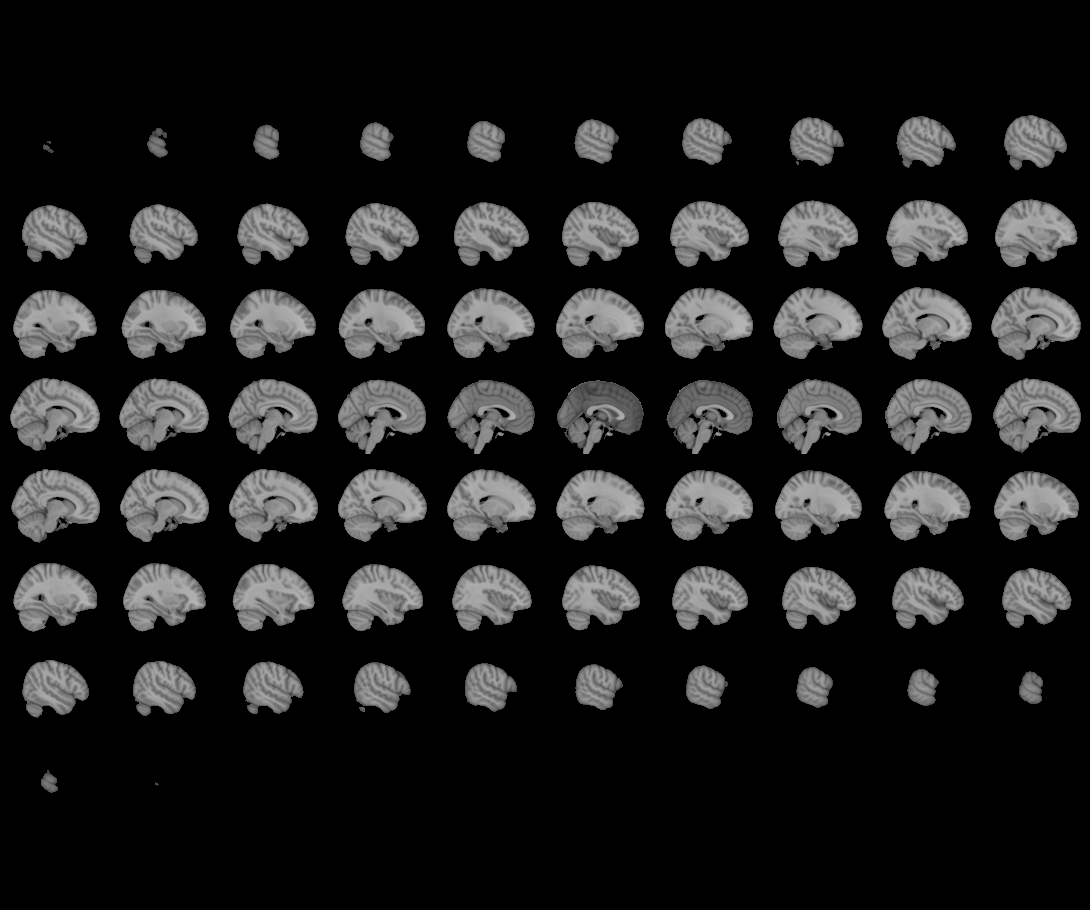
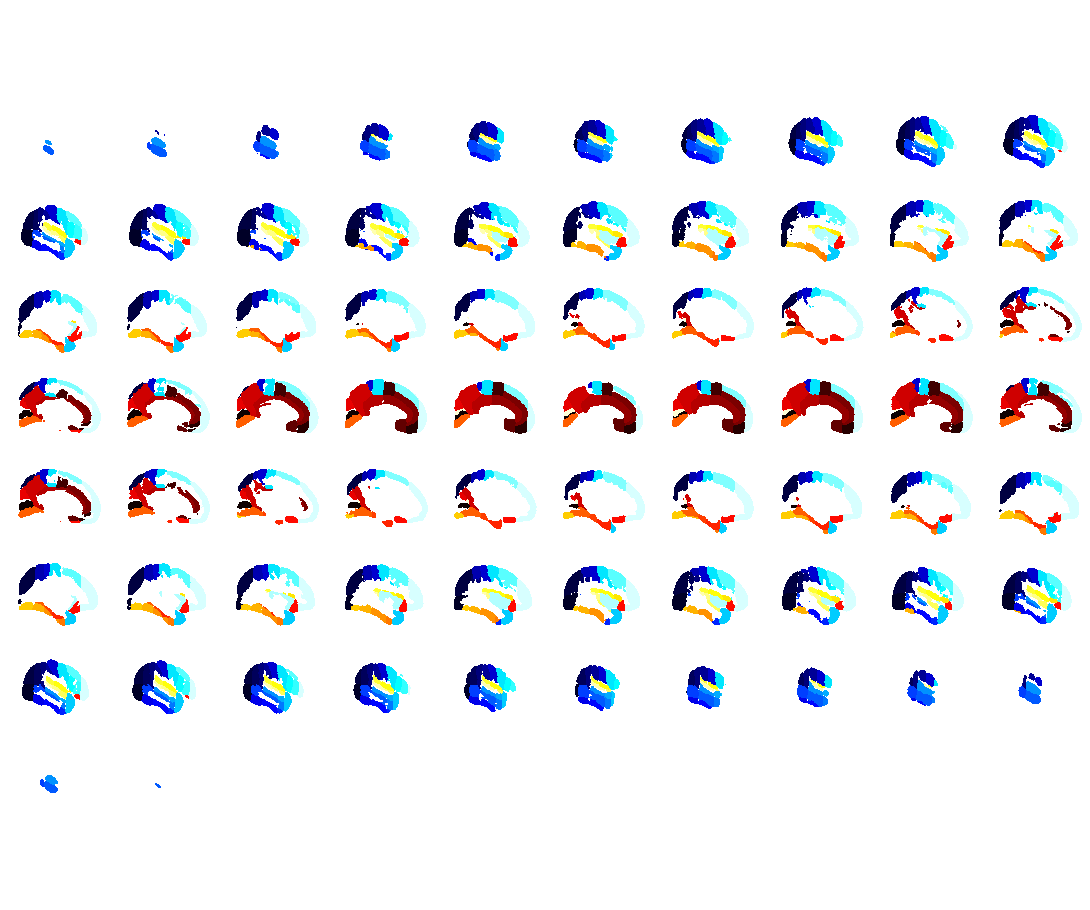

In [175]:
plotting.view_img(harvard_oxford_maps, title="Harvard Oxford atlas", 
                  symmetric_cmap=False, opacity=0.4)

In [176]:
harvard_oxford_labels

['Background',
 'Frontal Pole',
 'Insular Cortex',
 'Superior Frontal Gyrus',
 'Middle Frontal Gyrus',
 'Inferior Frontal Gyrus, pars triangularis',
 'Inferior Frontal Gyrus, pars opercularis',
 'Precentral Gyrus',
 'Temporal Pole',
 'Superior Temporal Gyrus, anterior division',
 'Superior Temporal Gyrus, posterior division',
 'Middle Temporal Gyrus, anterior division',
 'Middle Temporal Gyrus, posterior division',
 'Middle Temporal Gyrus, temporooccipital part',
 'Inferior Temporal Gyrus, anterior division',
 'Inferior Temporal Gyrus, posterior division',
 'Inferior Temporal Gyrus, temporooccipital part',
 'Postcentral Gyrus',
 'Superior Parietal Lobule',
 'Supramarginal Gyrus, anterior division',
 'Supramarginal Gyrus, posterior division',
 'Angular Gyrus',
 'Lateral Occipital Cortex, superior division',
 'Lateral Occipital Cortex, inferior division',
 'Intracalcarine Cortex',
 'Frontal Medial Cortex',
 'Juxtapositional Lobule Cortex (formerly Supplementary Motor Cortex)',
 'Subcallo

(Cf this [ref](https://journals.physiology.org/doi/pdf/10.1152/jn.00912.2017) for ideas of ROIs)

In [177]:
roi_candidates = ['Parahippocampal Gyrus, anterior division',
                  'Parahippocampal Gyrus, posterior division',
                  'Temporal Fusiform Cortex, anterior division',
                  'Temporal Fusiform Cortex, posterior division',
                  'Temporal Occipital Fusiform Cortex',
                  'Occipital Fusiform Gyrus',]

In [178]:
roi_ix = [harvard_oxford_labels.index(roi_name) for roi_name in roi_candidates]

In [179]:
roi_ix

[34, 35, 37, 38, 39, 40]

In [180]:
import nibabel as nib
harvard_oxford_img = nib.load(harvard_oxford_maps)
print(f"Shape of map: {harvard_oxford_img.shape}") 

Shape of map: (91, 109, 91)


In [182]:
harvard_oxford_img_resampled = resample_to_img(harvard_oxford_img, betamaps, interpolation='nearest')
print(f"Shape of resampled map: {harvard_oxford_img_resampled.shape}")

Shape of resampled map: (56, 62, 53)


In [81]:
roi_mask = np.isin(harvard_oxford_img_resampled.get_fdata(), roi_ix)

In [183]:
roi_mask_int = nib.Nifti1Image(roi_mask.astype(int), affine=harvard_oxford_img_resampled.affine)

/opt/conda/shared/envs/ni38/lib/python3.8/site-packages/nilearn/image/resampling.py:527: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/opt/conda/shared/envs/ni38/lib/python3.8/site-packages/nilearn/image/resampling.py:273: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn("Resampling binary images with continuous or "



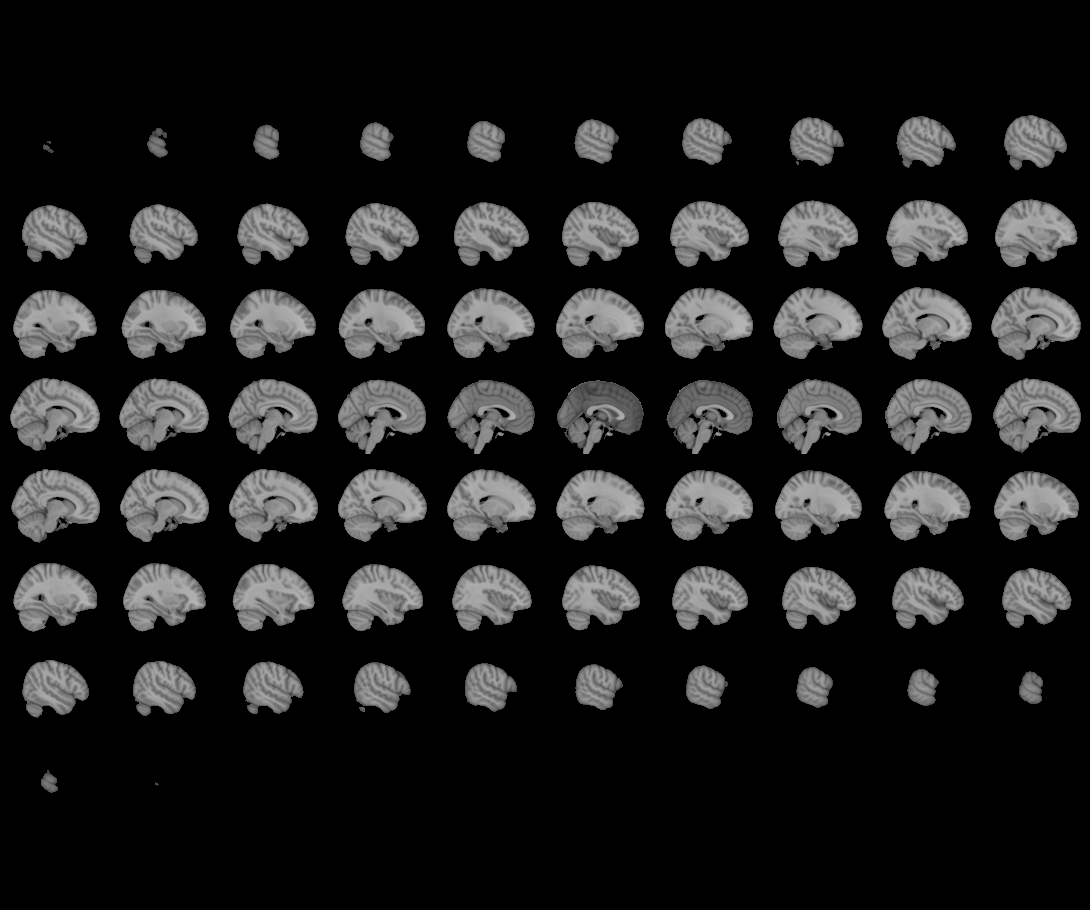
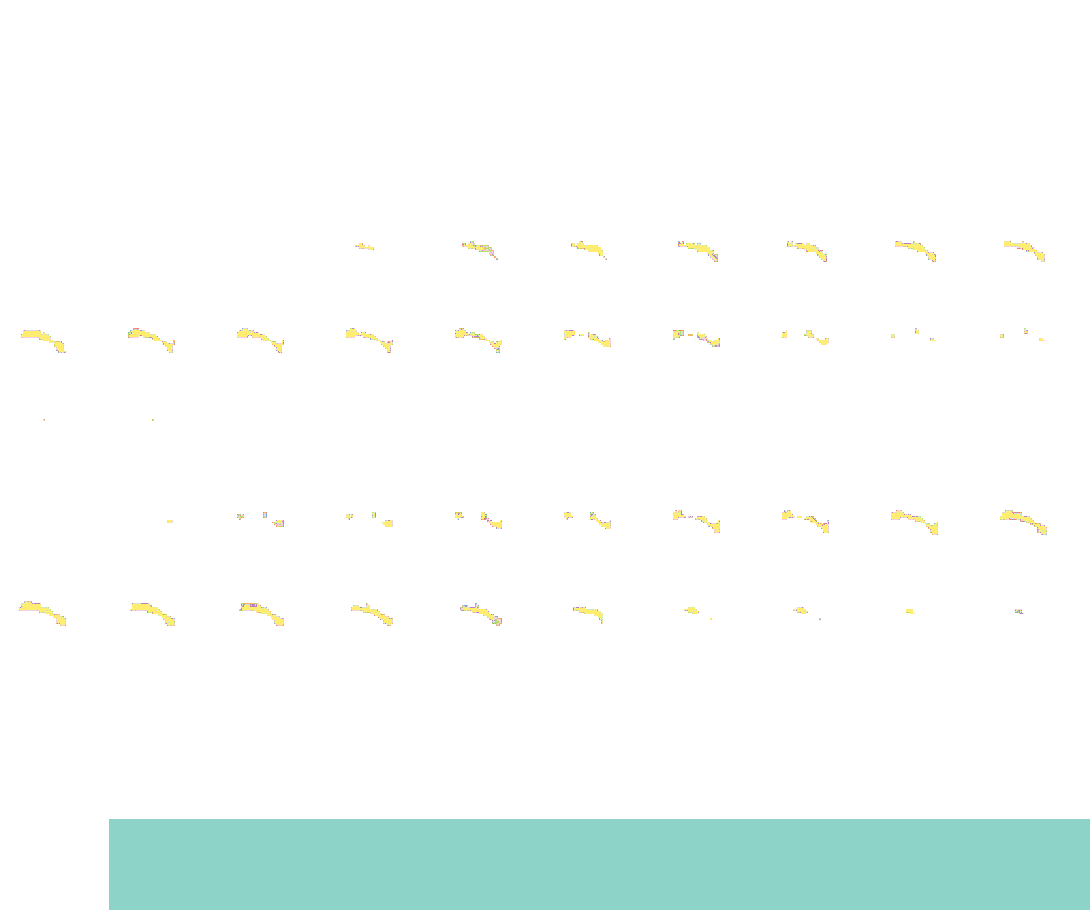

In [184]:
plotting.view_img(roi_mask_int, title="ROI candidates", cmap="Set3", 
                  symmetric_cmap=False, opacity=0.4)

In [185]:
from nilearn import masking

In [186]:
# Transforming the data with the right shape
X_rois = masking.apply_mask(betamaps, roi_mask_int)
print(f"Shape of indexed data: {X_rois.shape}")

Shape of indexed data: (24, 1208)


This is better but we can go further !

##### Reducing the number of features, solution 2: extracting mean beta for each ROI of an atlas

In [187]:
from nilearn.input_data import NiftiLabelsMasker

In [188]:
masker = NiftiLabelsMasker(labels_img=harvard_oxford_maps)

In [189]:
betamaps.shape

(56, 62, 53, 24)

In [190]:
# Betas per atlas ROI
X_atlas_by_ROI = masker.fit_transform(betamaps)

In [192]:
X_atlas_by_ROI.shape

(24, 48)

### Building the feature matrix for all runs

In [193]:
def get_X_y_from_atlas(sub_id, run_id, layout=bids_layout, atlas=harvard_oxford_maps,
                       scaling=True):
    # Get TR
    raw_func_file = layout.get(scope="raw", subject=sub_id, run=run_id, extension='nii.gz', 
                                    suffix="bold", return_type='filename')[0]
    raw_func_metadata = layout.get_metadata(raw_func_file)
    tr = raw_func_metadata['RepetitionTime']
    # Get 4D fmri data
    func_file = layout.get(scope="derivatives", subject=sub_id, run=run_id, datatype='func',
                           extension='nii.gz', suffix="bold")[0]
    # Get fmri mask
    func_mask_file = layout.get(scope="derivatives", subject=sub_id, run=run_id, datatype='func',
                                extension='nii.gz', suffix="mask", return_type='filename')[0]
    # Get event files and extract face and house
    run_event_file = layout.get(subject=sub_id, task="objectviewing", suffix="events", run="1")[0]
    event_df = run_event_file.get_df()
    # Rename events to have unique stimuli
    event_df['trial_type'] = event_df['trial_type'] + '_' + \
                         event_df.groupby('trial_type').cumcount().astype('str').str.zfill(2)
    # Get nuisance regressors
    confounds_file = layout.get(scope='fMRIPrep', desc='confounds', extension='tsv', 
                                subject=sub_id, run=run_id)[0]
    confounds_df = confounds_file.get_df()
    nuisance_cols = ['csf', 'trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']
    nuisance_regs = confounds_df[nuisance_cols]
    # Define first level model
    flm = FirstLevelModel(t_r=tr, hrf_model='glover', drift_model='cosine', 
                          high_pass=0.01, mask_img=func_mask_file, smoothing_fwhm=6,
                          noise_model='ar1', n_jobs=1, minimize_memory=False, subject_label=sub_id) 
    # Fit the model
    flm.fit(run_imgs=func_file.path, events=event_df, confounds=nuisance_regs)
    # Create labels
    dm = flm.design_matrices_[0]
    labels = [stim for stim in dm.columns if stim.startswith(('face', 'house'))]
    y_label = [1 if label.startswith('face') else 0 for label in labels]
    # Extract beta maps for stimuli of interest
    betamaps_list = []
    for label in labels:
        betamaps_list.append(flm.compute_contrast(label, stat_type='t', output_type='effect_size'))
    betamaps = concat_imgs(betamaps_list)
    # Get mean beta per ROI of provided atlas
    masker = NiftiLabelsMasker(labels_img=atlas)
    X_atlas_by_ROI = masker.fit_transform(betamaps)
    if scaling:
        scaler = StandardScaler()
        X_atlas_by_ROI_scaled = scaler.fit_transform(X_atlas_by_ROI)
        return X_atlas_by_ROI_scaled, y_label
    else:
        return X_atlas_by_ROI, y_label

We can now build the whole feature matrix and label vector for all subjects

In [194]:
subjects = bids_layout.get_subjects()
subjects

['1', '2', '3', '4', '5', '6']

In [558]:
max_run = 5
for sub_id in subjects:
    print(f"Processing subject {sub_id}")
    run_ids = bids_layout.get_runs(subject=sub_id)
    X_atlas_by_ROI_runs = []
    y_label_runs = []
    for run_id in run_ids:
        if run_id <= max_run:
            X_atlas_by_ROI, y_label = get_X_y_from_atlas(sub_id, run_id, layout=bids_layout, 
                                                         atlas=harvard_oxford_maps,
                                                         scaling=True)
            X_atlas_by_ROI_runs.append(X_atlas_by_ROI)
            y_label_runs.append(y_label)
        else:
            break
    # Concatenate run data
    X_sub = np.vstack(X_atlas_by_ROI_runs)
    y_sub = np.concatenate(y_label_runs)
    # Save the data
    np.save(f'X_sub{sub_id}.npy', X_sub)
    np.save(f'y_sub{sub_id}.npy', y_sub)

Processing subject 1
Processing subject 2
Processing subject 3
Processing subject 4
Processing subject 5
Processing subject 6


### Exercise
Apply the machine learning classification approach we saw at the beginning to identify voxels predicting stimulus (face vs house). This is an MVPA task.
* Start with one subject
* Leave one subject for the final assessment
* Implement leave one subject out cross validation with the rest of the subjects (cf. [leave one group out] (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneGroupOut.html))
* (Advanced) Implement nested cross validation for hyper-parameter tuning with leave one run out

You can load the subject data with:

In [195]:
!ls

X_sub1.npy  X_sub5.npy	glm.ipynb		wine.csv    y_sub4.npy
X_sub2.npy  X_sub6.npy	img			y_sub1.npy  y_sub5.npy
X_sub3.npy  atlases	ml-task-previous.ipynb	y_sub2.npy  y_sub6.npy
X_sub4.npy  ds000105	ml-task.ipynb		y_sub3.npy


In [196]:
sub_id = 1
X_sub1 = np.load(f'X_sub{sub_id}.npy')

In [198]:
X_sub1.shape

(120, 48)

In [199]:
y_sub1 = np.load('y_sub1.npy')

In [201]:
y_sub1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])